<a href="https://colab.research.google.com/github/Peter5793/Data_work/blob/master/Pipeline_Forecast__2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

# ADMISSION PIPELINE FORECAST 2021

The forecast is made for the year 2021, Application, interview scheduled and Interview conducted

The model assumes that all candidates are coming for the interviews, despite having an opt out chance by paying directly.
We shall be using data from the [LIVE DB](https://docs.google.com/spreadsheets/d/1fqa6hilno05YnWE-RoRzhCZFX7wd7nMhd_2S0VHfWak/edit?ts=5ebce625#gid=648734435), with data all the way from 2019. This is to look at the seasonality of how the pipeline has been performing and how the COVID period translates to the present time.

We shall take alot of tools and methods into consideration, and doing a cross validation so as to come up with the best prediction Model from our data
They include:
* Multiple Linear Regression (MLR)
* KNN
* Facebook Prophet



In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
#getting the data 
adm_data = pd.read_csv('Pipeline forecast.csv')

adm_data.tail()

,Date,applications,interviews_scheduled,Interviews_conducted,Accepted,Paid
378,1/13/2021,10,2,0,0,0
379,1/14/2021,18,1,0,0,0
380,1/15/2021,14,1,0,0,0
381,1/16/2021,8,0,0,0,0
382,1/17/2021,7,0,0,0,0


In [ ]:
#checking the datatype for each column
adm_data.dtypes

Date                    object
applications             int64
interviews_scheduled     int64
Interviews_conducted     int64
Accepted                 int64
Paid                     int64
dtype: object

In [ ]:
#checking for any missiong values
adm_data.apply(lambda x: sum(x.isnull()), axis = 0)
#we do not have any missing fields in our dataset 

Date                    0
applications            0
interviews_scheduled    0
Interviews_conducted    0
Accepted                0
Paid                    0
dtype: int64

### Exploratory analysis
We will look at the correlation between the variables in the data set 

In [ ]:
adm_corr_matrix = adm_data.corr()
adm_corr_matrix

,applications,interviews_scheduled,Interviews_conducted,Accepted,Paid
applications,1.000000,0.477754,0.514190,0.416338,0.262481
interviews_scheduled,0.477754,1.000000,0.913671,0.750705,0.485349
Interviews_conducted,0.514190,0.913671,1.000000,0.776144,0.561693
Accepted,0.416338,0.750705,0.776144,1.000000,0.293762
Paid,0.262481,0.485349,0.561693,0.293762,1.000000


<AxesSubplot:title={'center':'Relationship between  Admission pipeline variables'}>

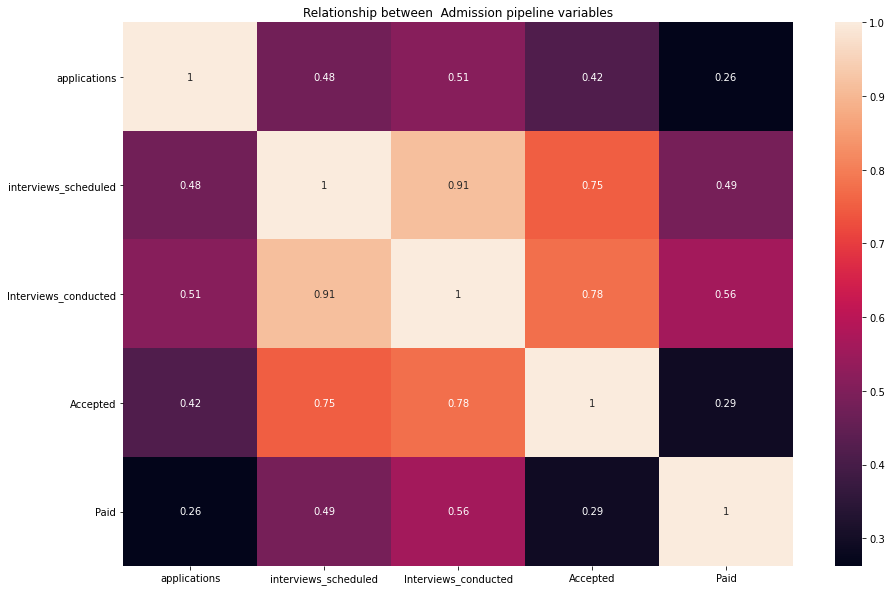

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Relationship between  Admission pipeline variables")
sns.heatmap(adm_corr_matrix, annot = True)

### Discussion
Major take away from the data is that we have 75% of the accepted being accounted for by the interview scheduled, while 78% of the interview conducted, 91% of the interviews conducted are accounted by the interview scheduled.
Also applications only account for 26% of the total number that of paids.


<AxesSubplot:ylabel='Paid'>

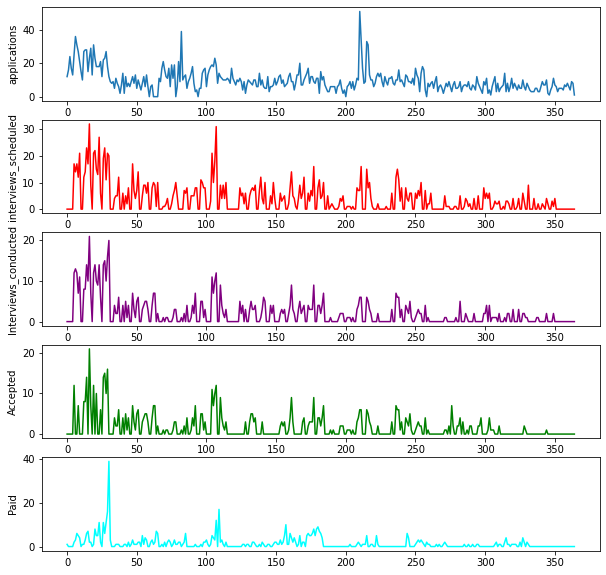

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(511)
sns.lineplot(data = adm_data['applications'])
plt.subplot(512)
sns.lineplot(data = adm_data['interviews_scheduled'], color='red')
plt.subplot(513)
sns.lineplot(data = adm_data['Interviews_conducted'], color='purple')
plt.subplot(514)
sns.lineplot(data = adm_data['Accepted'], color='green')
plt.subplot(515)
sns.lineplot(data = adm_data['Paid'], color='cyan')

## Implementation and Evalution 

In [ ]:
#preparing the set to fit the model, by making the attributes and labels
# we will not be predicting paids but accepted into the program.
#for paids we shall use an optimization model
x = adm_data[['applications', 'interviews_scheduled', 'Interviews_conducted']]
y = adm_data['Accepted']

In [ ]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

In [ ]:
#training the algorithm 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#making the prediction 
y_pred = lm.predict(x_test)
adm_data_pred = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
adm_data_pred.sample(10)

,Actual,Predicted
146,0,2.891958
68,0,0.380606
65,2,1.990630
199,0,0.010874
361,0,0.010874
305,1,0.660237
159,1,1.605075
141,0,3.804352
281,2,0.067756
299,0,2.064886


In [ ]:
#lets find the intercept and coe-efficent of the model
print(lm.intercept_)
print(lm.coef_)

-0.10288936940585192
[0.02844092 0.09085574 0.59248076]


This is the formula that is used to calculate the number of accepted at any period of the pipeline
 $$ Y_o = Accepted $$
 $$ X_o = Applications $$
 $$ X_1 = Interviews Scheduled $$
 $$ X_2 = Interviews Conducted $$


$$
Y_o = -0.10288936940585192 + 0.02844092X_0 + 0.09085574X_1 + 0.59248076X_2
$$

In [ ]:
lm.score(x_test, y_test)
#the score is 32% which is not good for making predictions

0.3213794795478496

# KNN 
We shall use a KNN algorithm to create a regression model to predict the number accepted.
Since we already cleaned the data, we shall go straight into feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_y.fit_transform(x_test)

In [ ]:
#importing the KNN regression function
from sklearn.neighbors import KNeighborsRegressor
#there is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, we can use 5/10  as it is the most commonly used value for KNN algorithm.
kn = KNeighborsRegressor(10)
kn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

### Making Prediction using the Model


In [ ]:
y_pred_2 = kn.predict(x_test)

In [ ]:
#comparison between actual and predicted
adm_data_pred2 = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
adm_data_pred2.sample(10)

,Actual,Predicted
60,0,0.067756
286,0,1.644582
106,10,8.111463
306,1,0.836415
5,12,9.262450
206,0,0.010874
45,0,0.067756
191,1,0.158612
346,0,-0.074448
124,0,3.899210


In [ ]:
from sklearn import metrics
print('RMS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
kn.score(x_test, y_test)

RMS: 2.2309524235808924


0.3898460741007842

In [ ]:
adm_data_pred2.to_csv(r'C:/Users/hp/Desktop/Data Excerise/ADM2_PRED.csv',index = False)


In [ ]:
adm_data_pred2.shape

(110, 2)

The R squared for both models is low, since we are looking at human behaviour which sometimes is hard to predict and also the data was hampered by the COVID19 pandemic. Humans are inherently diffiuclt to predict as opposed to other physical processes

## Desicion Tree Regression 
We shall also be using desicion tree to perform the regression test

In [ ]:
#spiliting the data for this algorithm 
x_2= adm_data[['applications', 'interviews_scheduled', 'Interviews_conducted']]
y_2= adm_data['Accepted']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size= 0.2, random_state = 0)

In [ ]:
# Most of the data was already cleaned, we shall begin at training the algorithm 

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 0)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
#making the predictions
y_pred = dtr.predict(x_test)

In [ ]:
adm_data_pred3 = pd.DataFrame({'Actual': y_test,'Prediction': y_pred})
adm_data_pred3.sample(10)

,Actual,Prediction
164,0,0.0
26,14,0.0
259,1,1.0
54,3,3.0
113,1,1.0
56,5,5.0
124,0,5.0
302,1,0.0
214,0,0.0
20,0,14.0


In [ ]:
from sklearn import metrics

print('the root mean squared error: ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

the root mean squared error:  3.3743769850532304


In [ ]:
dtr.score(x_test, y_test)

-0.4434825477814772

# Standard Vector Regression

In [ ]:
x_3= adm_data[['applications', 'interviews_scheduled', 'Interviews_conducted']]
y_3= adm_data['Accepted']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_3, y_3, test_size= 0.2, random_state = 0)

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test =  sc_y.fit_transform(x_test)

In [ ]:
#Fitting in our model 
#Use the kernel type: Linear
from sklearn.svm import SVR
regressor =SVR(kernel = 'linear')

regressor.fit(x_train, y_train )


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sample(12)

,Actual,Predicted
124,0,4.060055
302,1,-0.424341
240,3,2.266540
114,3,2.266860
254,2,1.370080
6,0,11.234974
173,2,3.162947
270,0,-0.424981
59,0,-0.424971
159,1,1.368811


In [ ]:
regressor.score(x_test, y_test)

0.04436745988211144

In [ ]:
X = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('The root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

The root mean squared error:  2.745574902562294


# FACEBOOK PROPHET

In [ ]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fbprophet

In [90]:
applications = pd.DataFrame(adm_data[['Date ','applications']])
applications.head()


,Date,applications
0,1/1/2020,12
1,1/2/2020,16
2,1/3/2020,24
3,1/4/2020,17
4,1/5/2020,13


In [91]:
applications.rename(columns={'Date ': 'ds', 'applications':'y'}, inplace = True)
applications.head()

,ds,y
0,1/1/2020,12
1,1/2/2020,16
2,1/3/2020,24
3,1/4/2020,17
4,1/5/2020,13


In [92]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True)
m.fit(applications)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


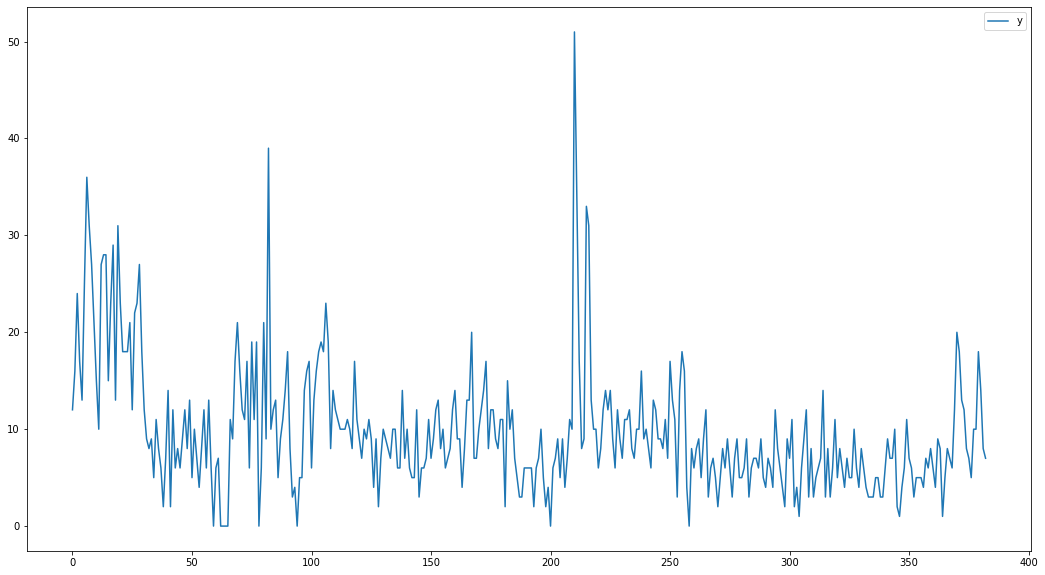

In [93]:
plt.rcParams['figure.figsize'] = (18, 10)
applications.plot()

In [94]:
future = m.make_future_dataframe(periods= 50)
future.tail()

,ds
428,2021-03-04
429,2021-03-05
430,2021-03-06
431,2021-03-07
432,2021-03-08


In [95]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
428,2021-03-04,2.236414,-7.894252,4.015669,2.235311,2.237476,-3.996467,-3.996467,-3.996467,-0.087720,-0.087720,-0.087720,-3.908747,-3.908747,-3.908747,0.0,0.0,0.0,-1.760053
429,2021-03-05,2.205919,-8.233256,3.923069,2.204793,2.207021,-4.656512,-4.656512,-4.656512,-1.156358,-1.156358,-1.156358,-3.500154,-3.500154,-3.500154,0.0,0.0,0.0,-2.450593
430,2021-03-06,2.175425,-8.510964,3.438844,2.174269,2.176567,-4.922154,-4.922154,-4.922154,-1.805056,-1.805056,-1.805056,-3.117099,-3.117099,-3.117099,0.0,0.0,0.0,-2.746730
431,2021-03-07,2.144930,-8.423576,3.772048,2.143741,2.146114,-4.670413,-4.670413,-4.670413,-1.906419,-1.906419,-1.906419,-2.763995,-2.763995,-2.763995,0.0,0.0,0.0,-2.525483
432,2021-03-08,2.114436,-4.376163,7.808765,2.113191,2.115661,-0.346611,-0.346611,-0.346611,2.097739,2.097739,2.097739,-2.444350,-2.444350,-2.444350,0.0,0.0,0.0,1.767824


Text(0.5, 1.0, 'Software Dev Applications')

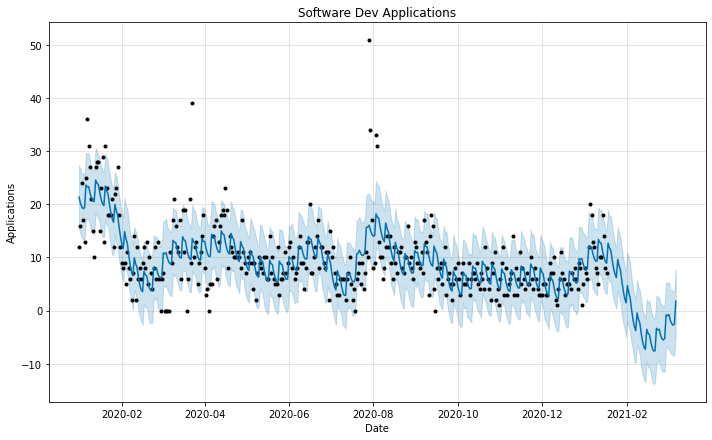

In [96]:
fig_1 = m.plot(forecast,xlabel = 'Date', ylabel = 'Applications')
ax = fig_1.gca()
ax.set_title("Software Dev Applications")

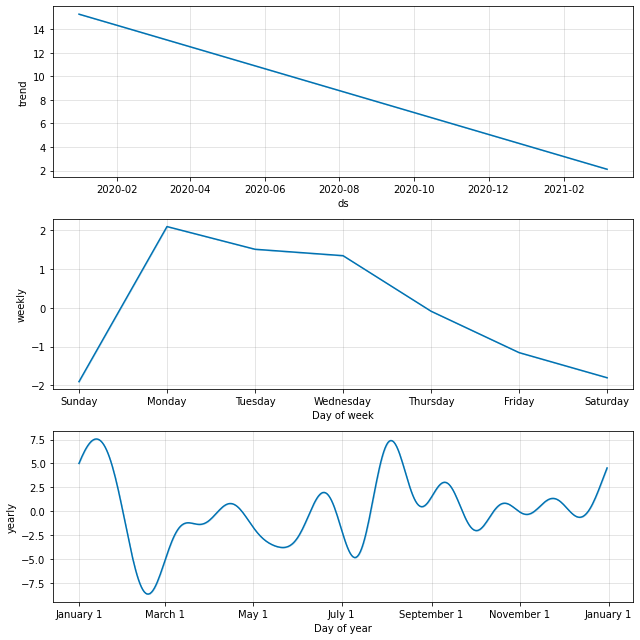

In [97]:
fig2 = m.plot_components(forecast)

In [78]:
from google.colab import files
forecast.to_csv('Forecast_SD_APP.csv') 
files.download('Forecast_SD_APP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
# We shall write a function to do carry out the repetitive tasks
def _pred(x):
    m = Prophet(yearly_seasonality=True, weekly_seasonality=True)
    m.fit(x)
    x.plot()
    future = m.make_future_dataframe(periods= 50)
    forecast = m.predict(future)
    fig_1 = m.plot(forecast, xlabel='Date', ylabel='Total')
    ax = fig_1.gca()
    fig_2 = m.plot_components(forecast)
    forecast.to_csv('Forecast_SD.csv') 
    files.download('Forecast_SD.csv')   
    return forecast.head(10)

In [101]:
int_sch = pd.DataFrame(adm_data[['Date ','interviews_scheduled']])
int_sch.head()

,Date,interviews_scheduled
0,1/1/2020,0
1,1/2/2020,0
2,1/3/2020,0
3,1/4/2020,0
4,1/5/2020,0


In [102]:
int_sch.rename(columns={'Date ': 'ds', 'interviews_scheduled':'y'}, inplace = True)
int_sch.head()

,ds,y
0,1/1/2020,0
1,1/2/2020,0
2,1/3/2020,0
3,1/4/2020,0
4,1/5/2020,0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,8.109231,2.967620,12.022818,8.109231,8.109231,-0.366864,-0.366864,-0.366864,0.980535,0.980535,0.980535,-1.347398,-1.347398,-1.347398,0.0,0.0,0.0,7.742367
1,2020-01-02,8.086336,2.947696,12.248350,8.086336,8.086336,-0.399642,-0.399642,-0.399642,0.726971,0.726971,0.726971,-1.126612,-1.126612,-1.126612,0.0,0.0,0.0,7.686694
2,2020-01-03,8.063441,5.540411,14.929322,8.063441,8.063441,2.140342,2.140342,2.140342,2.983671,2.983671,2.983671,-0.843330,-0.843330,-0.843330,0.0,0.0,0.0,10.203783
3,2020-01-04,8.040546,-0.878579,8.538994,8.040546,8.040546,-4.066051,-4.066051,-4.066051,-3.566276,-3.566276,-3.566276,-0.499775,-0.499775,-0.499775,0.0,0.0,0.0,3.974495
4,2020-01-05,8.017651,-0.908354,8.852504,8.017651,8.017651,-3.956669,-3.956669,-3.956669,-3.856986,-3.856986,-3.856986,-0.099684,-0.099684,-0.099684,0.0,0.0,0.0,4.060982
5,2020-01-06,7.994756,4.735908,14.567332,7.994756,7.994756,1.706044,1.706044,1.706044,1.354314,1.354314,1.354314,0.351730,0.351730,0.351730,0.0,0.0,0.0,9.700800
6,2020-01-07,7.971861,5.342446,14.730889,7.971861,7.971861,2.225609,2.225609,2.225609,1.377771,1.377771,1.377771,0.847838,0.847838,0.847838,0.0,0.0,0.0,10.197470
7,2020-01-08,7.948966,5.637036,15.288401,7.948966,7.948966,2.361246,2.361246,2.361246,0.980535,0.980535,0.980535,1.380711,1.380711,1.380711,0.0,0.0,0.0,10.310212
8,2020-01-09,7.926071,5.803041,15.015720,7.926071,7.926071,2.668227,2.668227,2.668227,0.726971,0.726971,0.726971,1.941256,1.941256,1.941256,0.0,0.0,0.0,10.594298
9,2020-01-10,7.903176,8.178393,18.306747,7.903176,7.903176,5.503071,5.503071,5.503071,2.983671,2.983671,2.983671,2.519399,2.519399,2.519399,0.0,0.0,0.0,13.406247


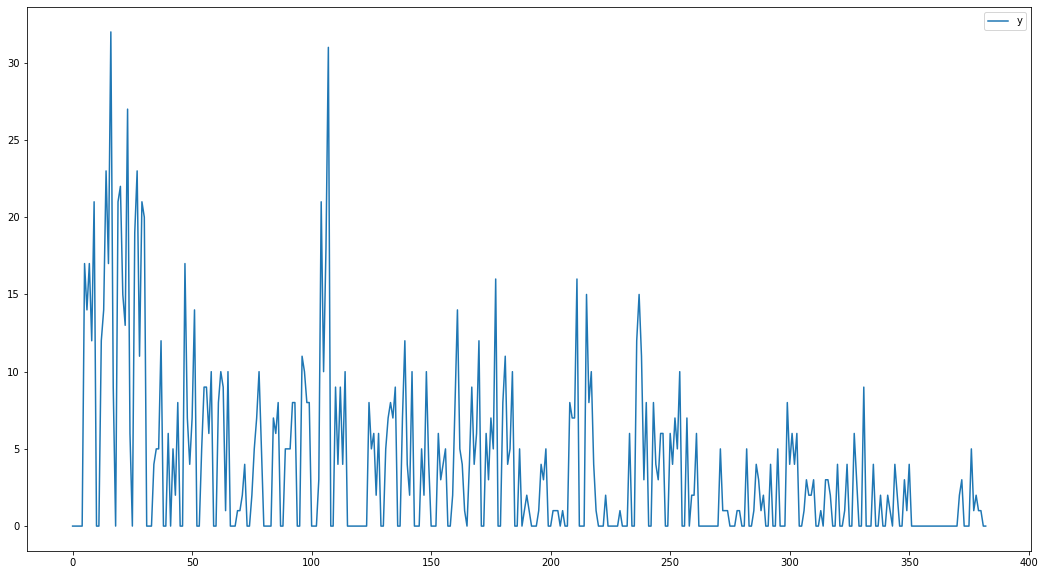

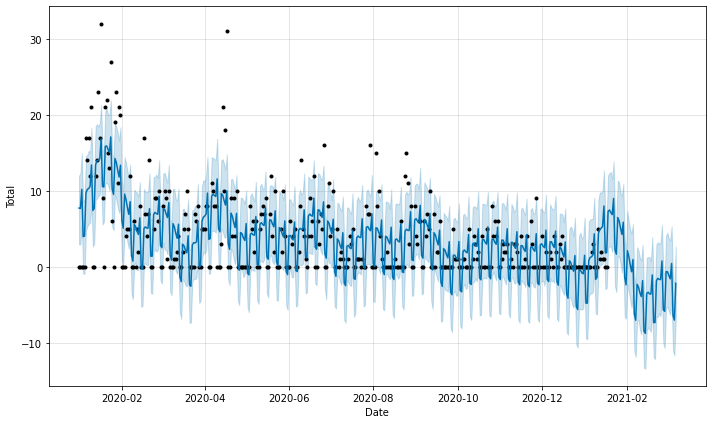

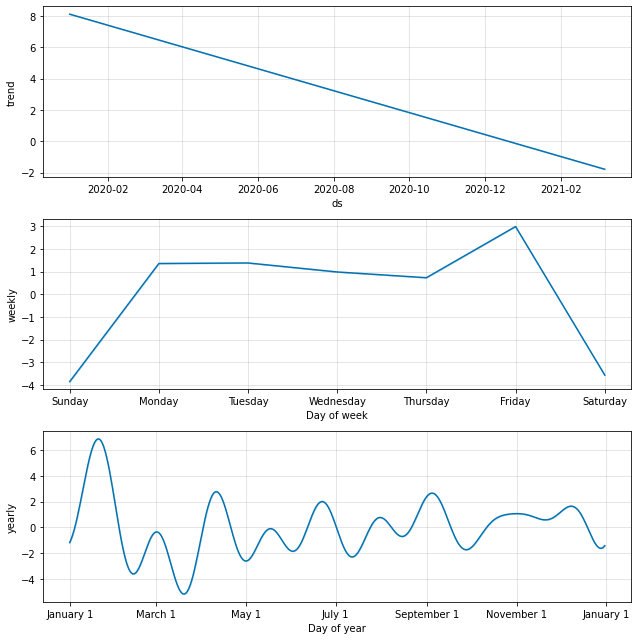

In [103]:
_pred(int_sch)

In [104]:
int_con = pd.DataFrame(adm_data[['Date ','Interviews_conducted']])
int_con.head()

,Date,Interviews_conducted
0,1/1/2020,0
1,1/2/2020,0
2,1/3/2020,0
3,1/4/2020,0
4,1/5/2020,0


In [106]:
int_con.rename(columns={'Date ': 'ds', 'Interviews_conducted':'y'}, inplace = True)
int_con.head()

,ds,y
0,1/1/2020,0
1,1/2/2020,0
2,1/3/2020,0
3,1/4/2020,0
4,1/5/2020,0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,5.053121,2.585344,8.127569,5.053121,5.053121,0.299346,0.299346,0.299346,0.636867,0.636867,0.636867,-0.337521,-0.337521,-0.337521,0.0,0.0,0.0,5.352467
1,2020-01-02,5.036725,2.279838,7.987404,5.036725,5.036725,0.137231,0.137231,0.137231,0.385795,0.385795,0.385795,-0.248564,-0.248564,-0.248564,0.0,0.0,0.0,5.173956
2,2020-01-03,5.020329,3.183037,9.033527,5.020329,5.020329,1.015431,1.015431,1.015431,1.134048,1.134048,1.134048,-0.118617,-0.118617,-0.118617,0.0,0.0,0.0,6.035761
3,2020-01-04,5.003933,0.261443,6.132800,5.003933,5.003933,-1.720405,-1.720405,-1.720405,-1.772718,-1.772718,-1.772718,0.052314,0.052314,0.052314,0.0,0.0,0.0,3.283529
4,2020-01-05,4.987537,0.444305,6.177013,4.987537,4.987537,-1.725569,-1.725569,-1.725569,-1.988756,-1.988756,-1.988756,0.263187,0.263187,0.263187,0.0,0.0,0.0,3.261969
5,2020-01-06,4.971141,3.139959,8.971262,4.971141,4.971141,1.126404,1.126404,1.126404,0.614485,0.614485,0.614485,0.511919,0.511919,0.511919,0.0,0.0,0.0,6.097546
6,2020-01-07,4.954746,3.907510,9.614191,4.954746,4.954746,1.785668,1.785668,1.785668,0.990279,0.990279,0.990279,0.795389,0.795389,0.795389,0.0,0.0,0.0,6.740414
7,2020-01-08,4.938350,3.720564,9.789470,4.938350,4.938350,1.746351,1.746351,1.746351,0.636867,0.636867,0.636867,1.109483,1.109483,1.109483,0.0,0.0,0.0,6.684700
8,2020-01-09,4.921954,4.128753,9.575203,4.921954,4.921954,1.834955,1.834955,1.834955,0.385795,0.385795,0.385795,1.449160,1.449160,1.449160,0.0,0.0,0.0,6.756908
9,2020-01-10,4.905558,4.970150,10.688589,4.905558,4.905558,2.942590,2.942590,2.942590,1.134048,1.134048,1.134048,1.808542,1.808542,1.808542,0.0,0.0,0.0,7.848148


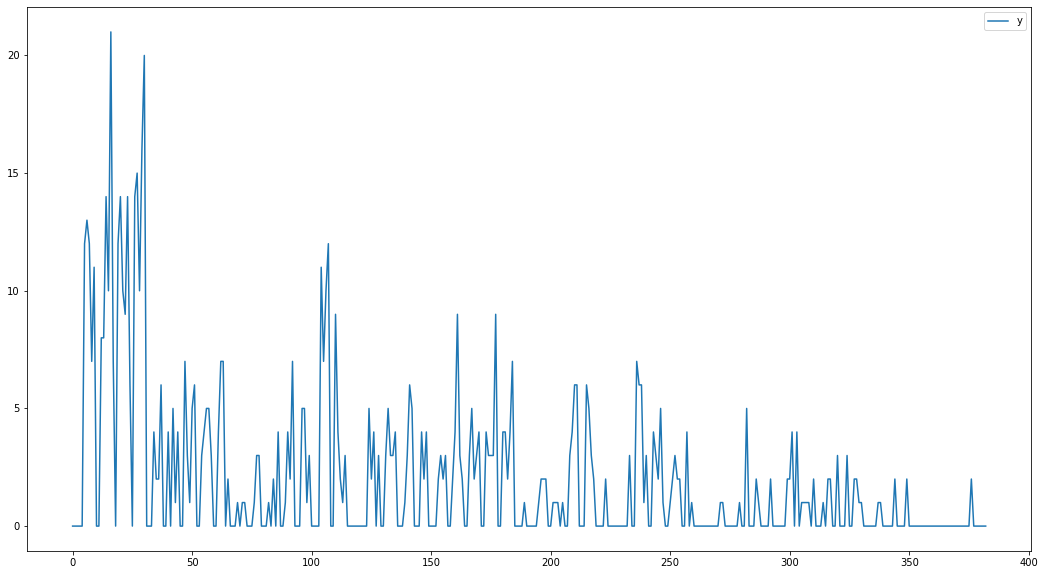

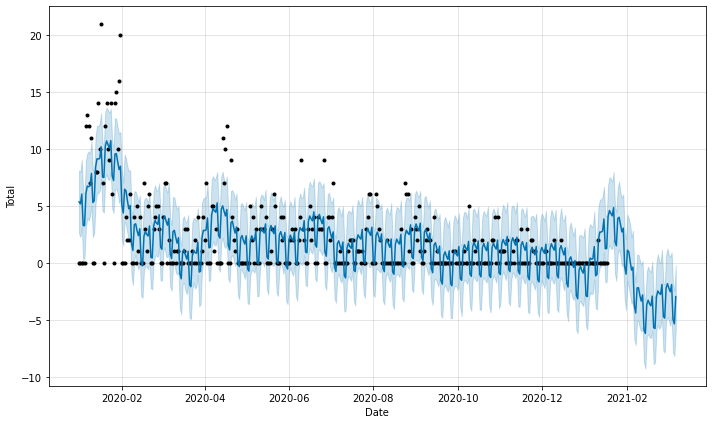

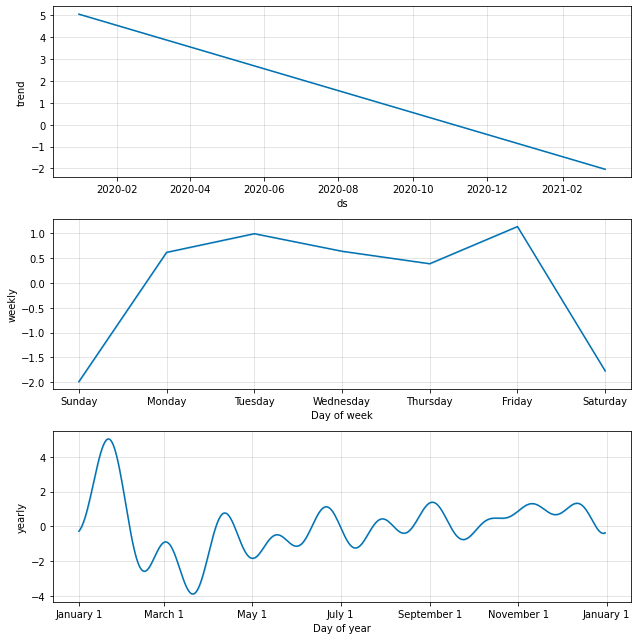

In [107]:
_pred(int_con)